# Dataset: Heart Attack Analysis & Prediction Dataset

A dataset for heart attack classification on Kaggle (<a href="https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset">See dataset page</a>)

In [82]:
import pandas as pd

data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Splitting dataset into input and output

In [84]:
data_input = data.drop(columns=['output'])
data_output = data['output']

# Splitting dataset into train, validation, and test

In [85]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('------------------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (148, 13)
y_train: (148,)
------------------------
X_val: (64, 13)
y_val: (64,)
------------------------
X_test: (91, 13)
y_test: (91,)


# Helper function: Evaluate model

In [86]:
from sklearn.metrics import accuracy_score

def eval_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_train, acc_val

# Support Vector Machine (SVM)

In [87]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])
eval_model(model, X_train, y_train, X_val, y_val)

(0.8716216216216216, 0.6875)

### Optimizing C parameter for Linear kernel

In [94]:
import numpy as np

C_values = np.arange(0.1, 1.1, 0.1)
acc_train_values = []
acc_val_values = []

for C in C_values:
    model = Pipeline([
        ('feature_scaling', StandardScaler()),
        ('svm', SVC(kernel='linear', C=C))
    ])
    acc_train, acc_val = eval_model(model, X_train, y_train, X_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results_linear = pd.DataFrame({
    'C': C_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_linear

,C,acc_train,acc_val
0,0.1,0.878378,0.734375
1,0.2,0.864865,0.734375
2,0.3,0.858108,0.734375
3,0.4,0.858108,0.734375
4,0.5,0.871622,0.718750
5,0.6,0.871622,0.703125
6,0.7,0.878378,0.687500
7,0.8,0.871622,0.687500
8,0.9,0.871622,0.687500
9,1.0,0.871622,0.687500


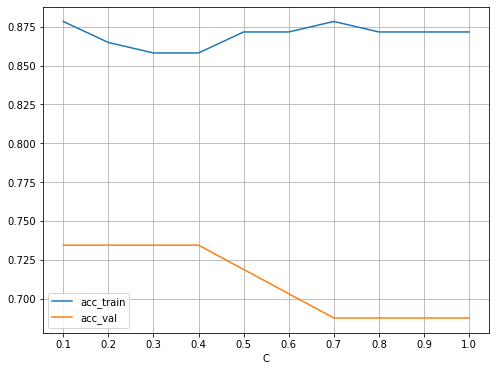

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

results_linear.plot(x='C', y=['acc_train', 'acc_val'], figsize=(8, 6))
plt.grid(axis='both')
plt.xticks(C_values)
plt.show()

### Optimizing C parameter for RBF kernel

In [96]:
C_values = np.arange(0.1, 1.1, 0.1)
acc_train_values = []
acc_val_values = []

for C in C_values:
    model = Pipeline([
        ('feature_scaling', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=C))
    ])
    acc_train, acc_val = eval_model(model, X_train, y_train, X_val, y_val)
    acc_train_values.append(acc_train)
    acc_val_values.append(acc_val)
    
results_rbf = pd.DataFrame({
    'C': C_values,
    'acc_train': acc_train_values,
    'acc_val': acc_val_values,
})

results_rbf

,C,acc_train,acc_val
0,0.1,0.851351,0.718750
1,0.2,0.871622,0.812500
2,0.3,0.885135,0.796875
3,0.4,0.885135,0.781250
4,0.5,0.891892,0.781250
5,0.6,0.898649,0.781250
6,0.7,0.912162,0.781250
7,0.8,0.912162,0.781250
8,0.9,0.912162,0.781250
9,1.0,0.912162,0.781250


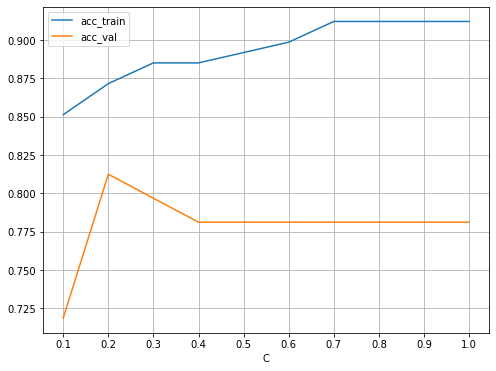

In [97]:
results_rbf.plot(x='C', y=['acc_train', 'acc_val'], figsize=(8, 6))
plt.grid(axis='both')
plt.xticks(C_values)
plt.show()

### Comparing best results

In [117]:
results_best = pd.concat([
    results_linear[results_linear['C']==0.4],
    results_rbf[results_rbf['C']==0.2],
]).reset_index(drop=True)

results_best.insert(0, 'kernel', ['linear', 'rbf'])

results_best

,kernel,C,acc_train,acc_val
0,linear,0.4,0.858108,0.734375
1,rbf,0.2,0.871622,0.812500


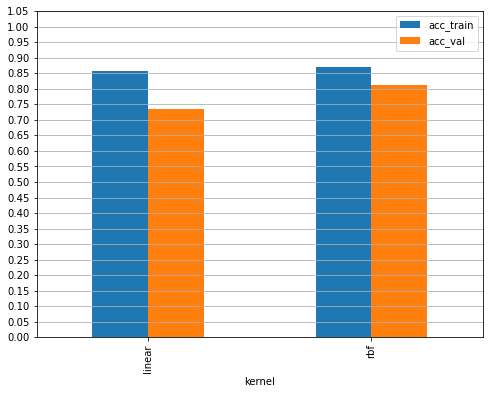

In [116]:
results_best.plot.bar(x='kernel', y=['acc_train', 'acc_val'], figsize=(8, 6))
plt.grid(axis='y')
plt.yticks(np.arange(0.0, 1.1, 0.05))
plt.show()

### Testing best model

In [93]:
best_model = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=0.2))
])
eval_model(best_model, X_train, y_train, X_test, y_test)

(0.8716216216216216, 0.8021978021978022)